In [119]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
import scipy

In [79]:
import scipy.stats
from scipy.stats import norm

In [80]:
variable=pd.read_csv('E:\\Downloads/survey.csv')
variable.head(10)

,Timestamp,How would you rate the effectiveness of current wellness initiatives in promoting a healthy lifestyle among students?,How would you describe your current dietary habits?,"On a scale of 1 to 5, how satisfied are you with the nutritional options available on campus?",Do you believe that the on-campus food options cater to a variety of dietary preferences and restrictions?,Are you satisfied with the variety of healthy food options in campus cafeterias or vending machines?,To what extent do you believe your dietary habits impact your overall well-being?,"In your opinion, how transparent is the university in providing information about the sourcing and preparation of the food served on campus?",How satisfied are you with the portion sizes of the food offered in campus dining facilities?,Name
0,11/25/2023 1:53:20,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied,NaN
1,11/25/2023 1:56:03,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied,NaN
2,11/25/2023 1:59:24,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied,NaN
3,11/25/2023 2:01:44,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied,NaN
4,11/25/2023 2:01:48,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied,NaN
5,11/25/2023 2:03:19,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral,NaN
6,11/25/2023 2:12:18,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied,NaN
7,11/25/2023 2:20:12,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied,Chahat Fateh Ali Khan
8,11/25/2023 2:28:56,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied,Ahsan Mujeeb
9,11/25/2023 2:32:03,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied,Muhammad Abdullah


In [81]:
variable=variable.drop(['Timestamp','Name'],axis=1)
variable.head(10)

,How would you rate the effectiveness of current wellness initiatives in promoting a healthy lifestyle among students?,How would you describe your current dietary habits?,"On a scale of 1 to 5, how satisfied are you with the nutritional options available on campus?",Do you believe that the on-campus food options cater to a variety of dietary preferences and restrictions?,Are you satisfied with the variety of healthy food options in campus cafeterias or vending machines?,To what extent do you believe your dietary habits impact your overall well-being?,"In your opinion, how transparent is the university in providing information about the sourcing and preparation of the food served on campus?",How satisfied are you with the portion sizes of the food offered in campus dining facilities?
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied


In [82]:
change_names={'How would you rate the effectiveness of current wellness initiatives in promoting a healthy lifestyle among students? ':'Effectiveness','How would you describe your current dietary habits?':'dietary_habits','On a scale of 1 to 5, how satisfied are you with the nutritional options available on campus?':'nutrition',
     'Do you believe that the on-campus food options cater to a variety of dietary preferences and restrictions?':'on-campus_food',
     'Are you satisfied with the variety of healthy food options in campus cafeterias or vending machines?':'vending_machines',
     'To what extent do you believe your dietary habits impact your overall well-being?':'dietary_habits_impact',
     'In your opinion, how transparent is the university in providing information about the sourcing and preparation of the food served on campus?':'transperancy',
     'How satisfied are you with the portion sizes of the food offered in campus dining facilities?':'dining_portion'}
variable = variable.rename(columns=change_names)
variable.head(10)

,How would you rate the effectiveness of current wellness initiatives in promoting a healthy lifestyle among students?,dietary_habits,nutrition,on-campus_food,vending_machines,dietary_habits_impact,transperancy,dining_portion
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied


In [83]:
change_name={'How would you rate the effectiveness of current wellness initiatives in promoting a healthy lifestyle among students?':'effectiveness'}
variable = variable.rename(columns=change_name)
variable.head(10)

,effectiveness,dietary_habits,nutrition,on-campus_food,vending_machines,dietary_habits_impact,transperancy,dining_portion
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied


In [84]:
variable['effectiveness(integer)']=pd.factorize(variable.effectiveness)[0]
variable.head(10)

,effectiveness,dietary_habits,nutrition,on-campus_food,vending_machines,dietary_habits_impact,transperancy,dining_portion,effectiveness(integer)
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied,0
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied,1
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied,0
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied,2
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied,1
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral,0
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied,3
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied,0
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied,2
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied,0


In [85]:
variable['nutrition(integer)']=pd.factorize(variable.nutrition)[0]
variable.head(10)

,effectiveness,dietary_habits,nutrition,on-campus_food,vending_machines,dietary_habits_impact,transperancy,dining_portion,effectiveness(integer),nutrition(integer)
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied,0,0
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied,1,0
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied,0,0
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied,2,1
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied,1,2
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral,0,1
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied,3,2
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied,0,3
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied,2,0
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied,0,2


In [86]:
variable['transperancy(integer)']=pd.factorize(variable.transperancy)[0]
variable.head(10)

,effectiveness,dietary_habits,nutrition,on-campus_food,vending_machines,dietary_habits_impact,transperancy,dining_portion,effectiveness(integer),nutrition(integer),transperancy(integer)
0,Neutral,Low carb,3,Neutral,Dissatisfied,Moderately impactful,Somewhat opaque,Dissatisfied,0,0,0
1,Highly effective,High protein,3,"Yes, they cater well",Neutral,Extremely impactful,Very transparent,Satisfied,1,0,1
2,Neutral,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Neutral,Satisfied,0,0,2
3,Not effective at all,Balanced,1 (Extremely dissatisfied),"No, they do not cater well",Very dissatisfied,Not impactful at all,Very opaque,Very dissatisfied,2,1,3
4,Highly effective,Low carb,2,Neutral,Neutral,Slightly impactful,Somewhat transparent,Dissatisfied,1,2,4
5,Neutral,High protein,1 (Extremely dissatisfied),Neutral,Very dissatisfied,Neutral,Somewhat opaque,Neutral,0,1,0
6,Slightly effective,Balanced,2,"No, they do not cater well",Neutral,Moderately impactful,Somewhat opaque,Satisfied,3,2,0
7,Neutral,High protein,4,"No, they do not cater well",Neutral,Slightly impactful,Neutral,Satisfied,0,3,2
8,Not effective at all,Balanced,3,"Somewhat, but there could be improvements",Dissatisfied,Extremely impactful,Somewhat opaque,Satisfied,2,0,0
9,Neutral,Balanced,2,"No, they do not cater well",Dissatisfied,Moderately impactful,Neutral,Satisfied,0,2,2


In [87]:
def outlier_remover(variable):
    for col in variable.columns:
         if pd.api.types.is_numeric_dtype(variable[col]):
            Q1=variable[col].quantile(0.25)
            Q3=variable[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            print(col)
            if lower<0:
               lower=0
            print('Q1 = ',Q1,' Q3 = ',Q3,' IQR = ',IQR)
            print(lower ,'>',col,'<',upper)
            mp.figure(figsize=(15,5))
            g=sns.boxenplot(variable[col],width=0.3)
            mp.show()
            variable=variable[(variable[col]>=lower) & (variable[col]<=upper)]
    return variable

effectiveness(integer)
Q1 =  1.0  Q3 =  3.0  IQR =  2.0
0 > effectiveness(integer) < 6.0


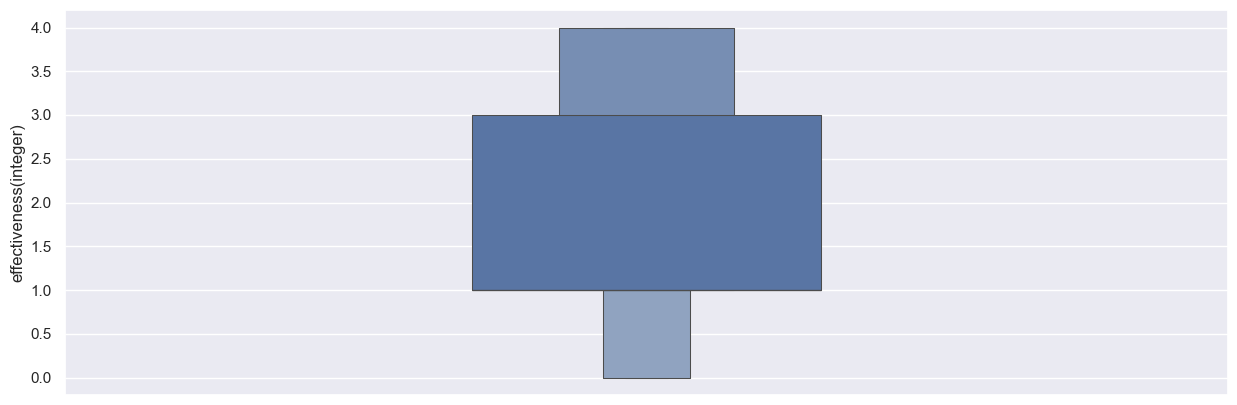

nutrition(integer)
Q1 =  1.0  Q3 =  3.0  IQR =  2.0
0 > nutrition(integer) < 6.0


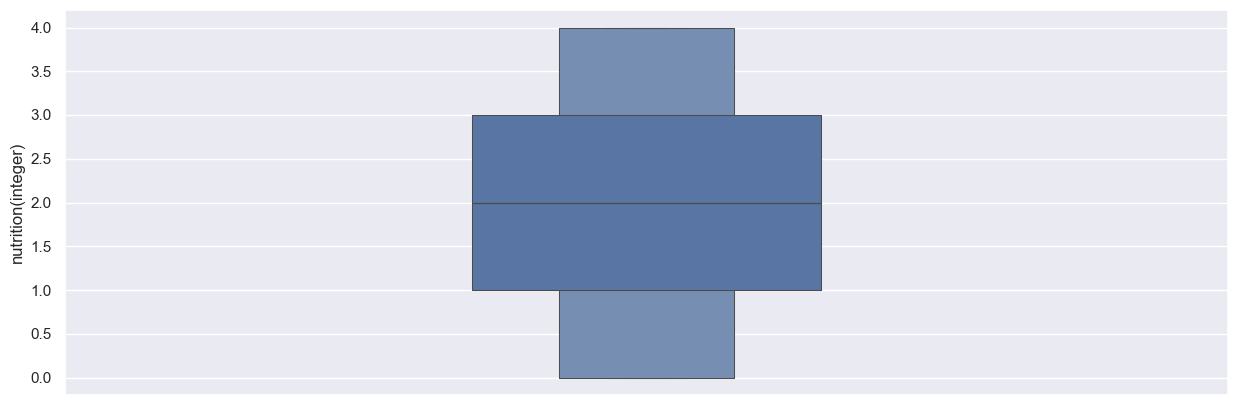

transperancy(integer)
Q1 =  0.0  Q3 =  4.0  IQR =  4.0
0 > transperancy(integer) < 10.0


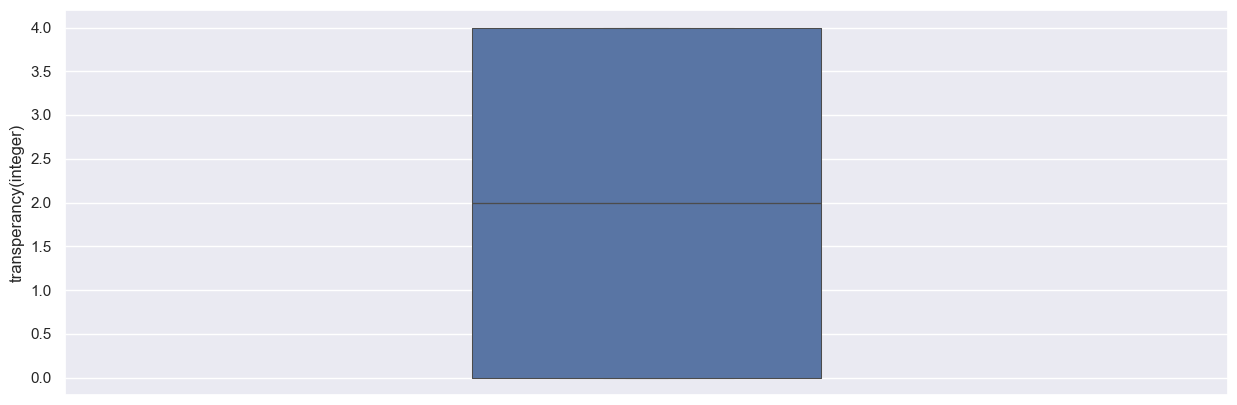

In [88]:
variable=outlier_remover(variable)

In [89]:
len(variable)

222

In [90]:
variable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   effectiveness           222 non-null    object
 1   dietary_habits          222 non-null    object
 2   nutrition               222 non-null    object
 3   on-campus_food          222 non-null    object
 4   vending_machines        222 non-null    object
 5   dietary_habits_impact   222 non-null    object
 6   transperancy            222 non-null    object
 7   dining_portion          222 non-null    object
 8   effectiveness(integer)  222 non-null    int64 
 9   nutrition(integer)      222 non-null    int64 
 10  transperancy(integer)   222 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 19.2+ KB


In [91]:
variable.describe()

,effectiveness(integer),nutrition(integer),transperancy(integer)
count,222.000000,222.000000,222.000000
mean,2.040541,1.950450,2.085586
std,1.443718,1.362814,1.621928
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000
75%,3.000000,3.000000,4.000000
max,4.000000,4.000000,4.000000


In [92]:
variable['effectiveness(integer)'].value_counts()

effectiveness(integer)
1    91
4    54
3    46
0    27
2     4
Name: count, dtype: int64

In [93]:
variable['vending_machines'].value_counts()

vending_machines
Neutral              95
Dissatisfied         42
Satisfied            37
Very dissatisfied    26
Very satisfied       22
Name: count, dtype: int64

In [94]:
variable['dietary_habits'].value_counts()

dietary_habits
Balanced             84
High protein         52
Low carb             37
Mostly vegetarian    37
Vegan                12
Name: count, dtype: int64

In [95]:
variable['on-campus_food'].value_counts()

on-campus_food
Yes, they cater well                         68
No, they do not cater well                   53
Neutral                                      51
Somewhat, but there could be improvements    50
Name: count, dtype: int64

In [96]:
variable['vending_machines'].value_counts()

vending_machines
Neutral              95
Dissatisfied         42
Satisfied            37
Very dissatisfied    26
Very satisfied       22
Name: count, dtype: int64

In [97]:
variable['dietary_habits_impact'].value_counts()

dietary_habits_impact
Extremely impactful     127
Neutral                  40
Moderately impactful     31
Slightly impactful       22
Not impactful at all      2
Name: count, dtype: int64

In [98]:
variable['dining_portion'].value_counts()

dining_portion
Satisfied            80
Neutral              65
Dissatisfied         38
Very dissatisfied    20
Very satisfied       19
Name: count, dtype: int64

In [99]:
import matplotlib.pyplot as plt

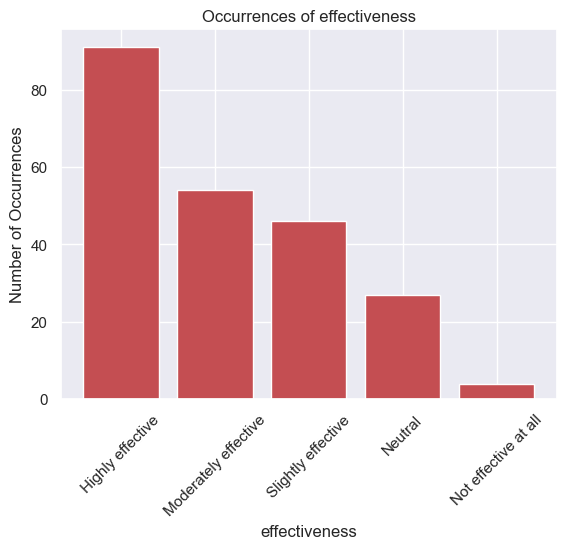

In [100]:
#effectiveness\tdietary_habits\tnutrition\ton-campus_food\tvending_machines\tdietary_habits_impact\ttransperancy\tdining_portion\n",
# Assuming the column you're interested in is named \"effectiveness\"\n",
column_name = 'effectiveness'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Plot the values against their number of occurrences\n",
plt.bar(value_counts.index, value_counts.values,color='r')
plt.xticks(rotation=45)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

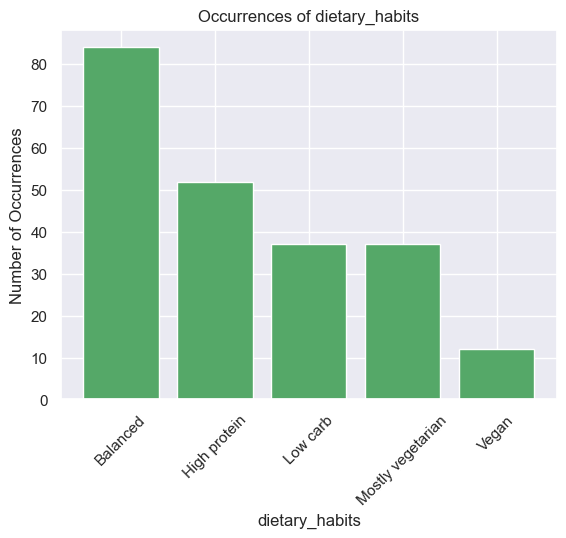

In [101]:
# Assuming the column you're interested in is named \"effectiveness\"\n",
column_name = 'dietary_habits'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values,color='g')
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=45)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

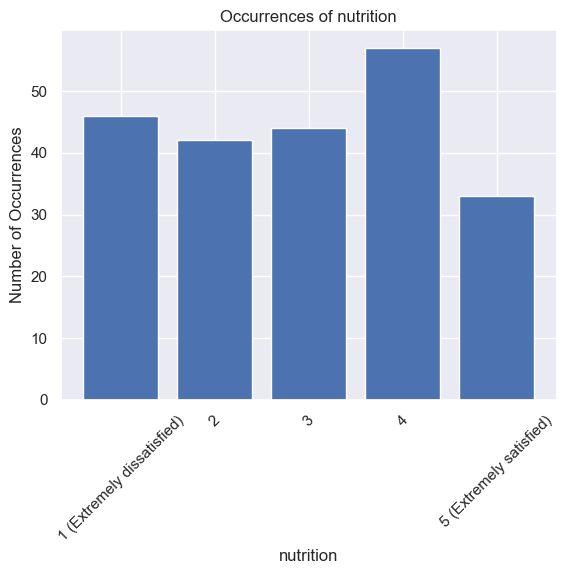

In [102]:
# Assuming the column you're interested in is named \"effectiveness\"\n",
column_name = 'nutrition'
# Count the occurrences of each unique value in the specified column
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences
plt.bar(sorted_values.index, sorted_values.values)
# Plot the values against their number of occurrences
plt.xticks(rotation=45)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

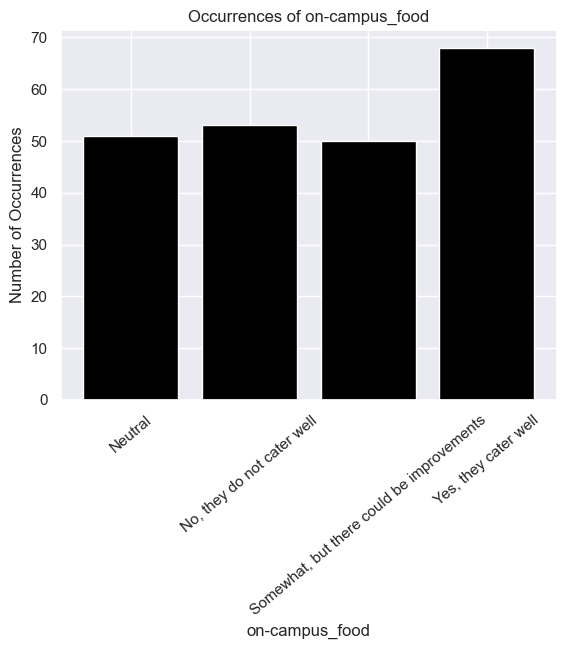

In [103]:
# Assuming the column you're interested in is named \"effectiveness\"\n",
#on-campus_food\tvending_machines\tdietary_habits_impact\ttransperancy\tdining_portion\n",
column_name = 'on-campus_food'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index() 
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values,color='black') 
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=40) 
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

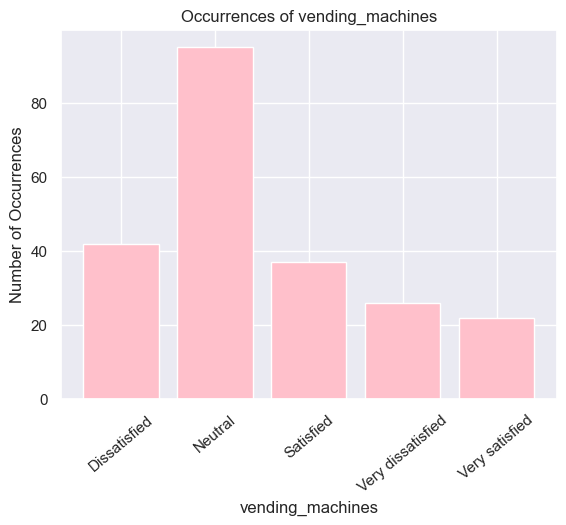

In [104]:
#vending_machines\tdietary_habits_impact\ttransperancy\tdining_portion\n",
column_name = 'vending_machines'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values,color='pink')
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=40)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

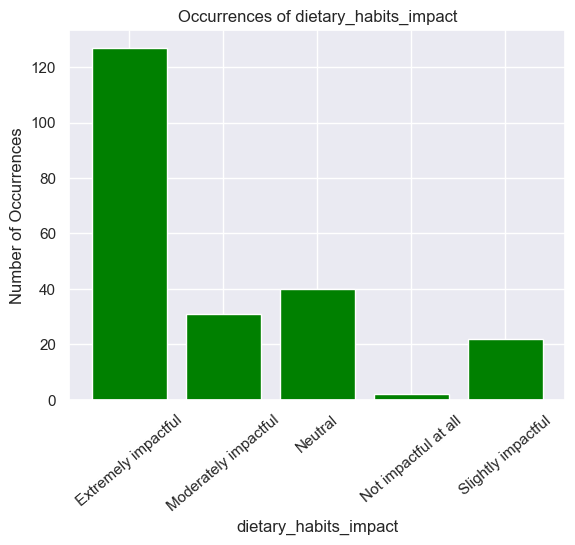

In [105]:
#vending_machines\tdietary_habits_impact\ttransperancy\tdining_portion\n",
column_name = 'dietary_habits_impact'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values,color='green')
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=40)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

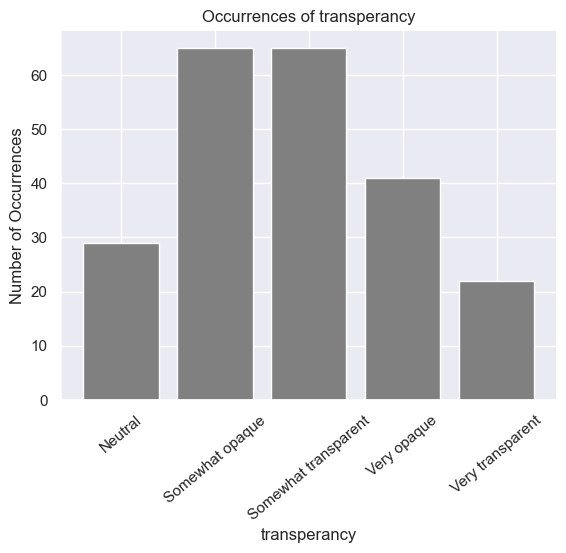

In [106]:
#vending_machines\tdietary_habits_impact\ttransperancy\tdining_portion\n",
column_name = 'transperancy'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values,color='grey')
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=40)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

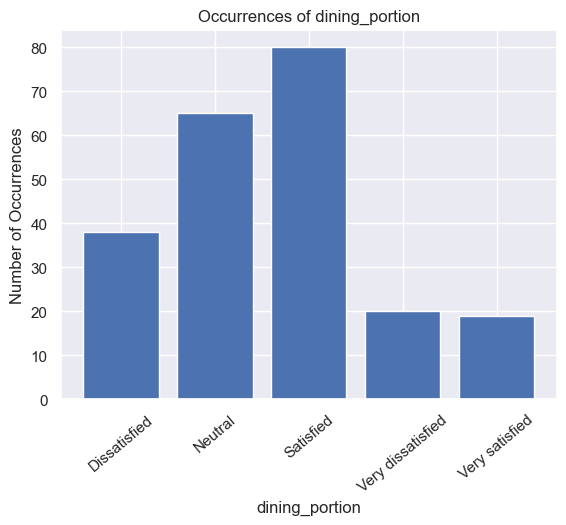

In [107]:
column_name = 'dining_portion'
# Count the occurrences of each unique value in the specified column\n",
value_counts = variable[column_name].value_counts()
# Sort the values and counts by index\n",
sorted_values = value_counts.sort_index()
# Plot the values against their number of occurrences\n",
plt.bar(sorted_values.index, sorted_values.values)
# Plot the values against their number of occurrences\n",
plt.xticks(rotation=40)
plt.xlabel(column_name)
plt.ylabel('Number of Occurrences')
plt.title(f'Occurrences of {column_name}')
plt.show()

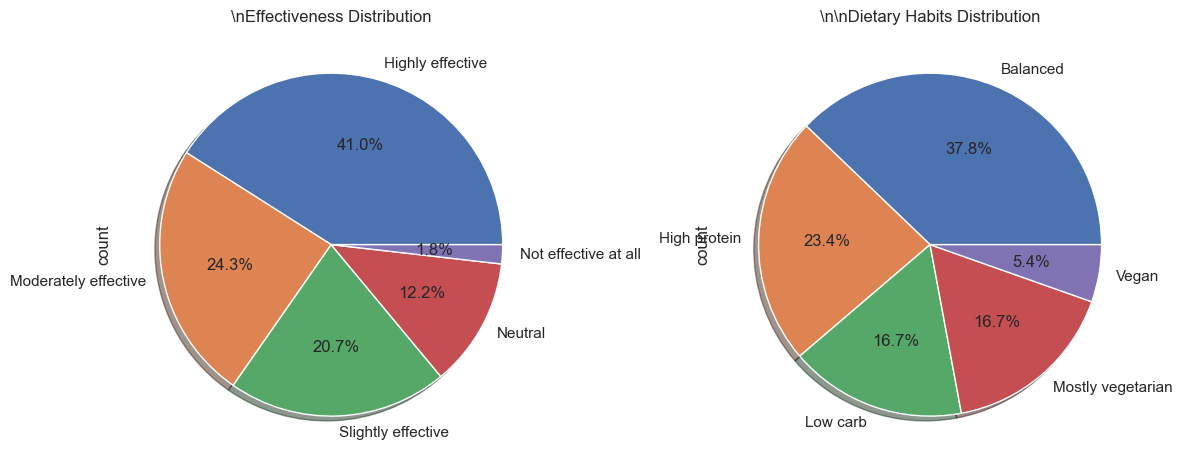

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'variable'\n",
# Create a figure with two subplots\n",
fig, ax = plt.subplots(1, 2,  figsize=(12, 12))
# Plot the pie chart for 'effectiveness' in the first subplot with increased shadow\n",
variable['effectiveness'].value_counts().plot.pie(shadow=True, autopct='%2.1f%%', ax=ax[0])
ax[0].set_title('\\nEffectiveness Distribution')
# Plot the pie chart for 'dietary_habits' in the second subplot with increased shadow\n",
variable['dietary_habits'].value_counts().plot.pie(shadow=True, autopct='%2.1f%%', ax=ax[1])
ax[1].set_title('\\n\\nDietary Habits Distribution')
# Adjust layout to prevent overlapping\n",
plt.tight_layout()
# Show the plot\n",
plt.show()

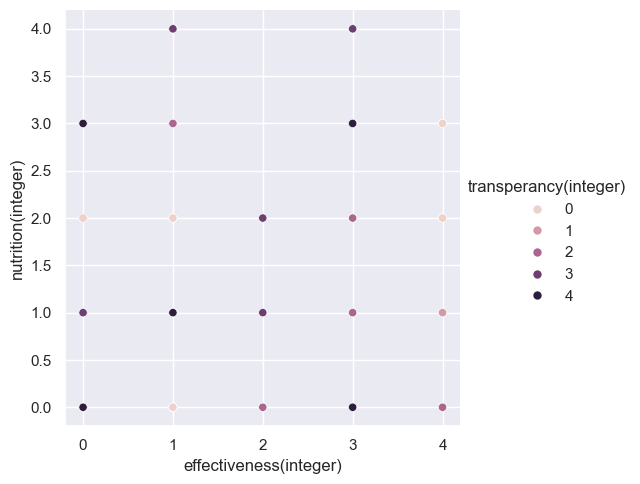

In [109]:
sns.relplot(x='effectiveness(integer)',y='nutrition(integer)',hue='transperancy(integer)',data=variable)

,freq
effectiveness(integer)_distribution,
0.0 - 0.8,27
0.8 - 1.6,91
1.6 - 2.4,4
2.4 - 3.2,46
3.2 - 4.0,54


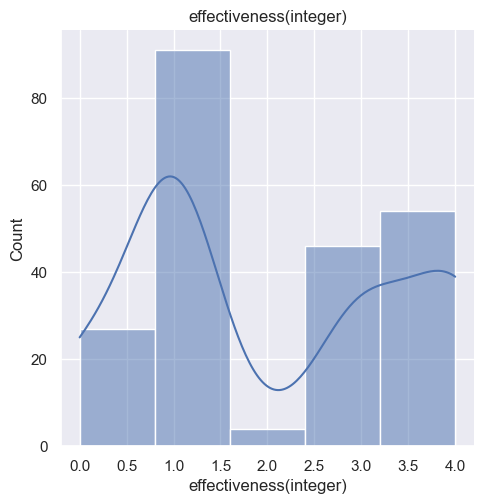

,freq
nutrition(integer)_distribution,
0.0 - 0.8,44
0.8 - 1.6,46
1.6 - 2.4,42
2.4 - 3.2,57
3.2 - 4.0,33


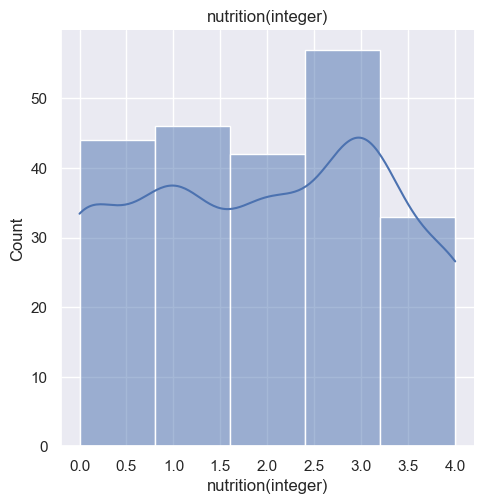

,freq
transperancy(integer)_distribution,
0.0 - 0.8,65
0.8 - 1.6,22
1.6 - 2.4,29
2.4 - 3.2,41
3.2 - 4.0,65


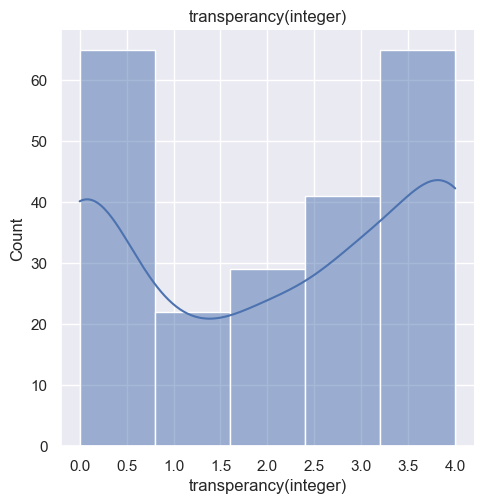

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'variable'\n",
sns.set(font_scale=1)
def freq_dist(df):
    for col in variable.columns:
        if pd.api.types.is_numeric_dtype(variable[col]):
            g = np.histogram(variable[col], bins=5, density=False)
            col1 = []
            col2 = []
            for i in range(len(g[0])):
                col1.append(g[0][i])
                col2.append(f'{round(g[1][i], 2)} - {round(g[1][i + 1], 2)}')
            l = pd.DataFrame({f'{col}_distribution': col2, 'freq': col1})
            l.set_index(f'{col}_distribution', inplace=True)
            display(l)
            sns.displot(variable[col], kde=True, bins=5).set(title=col)
            plt.show()
# Call the function\n",
freq_dist(variable)

In [111]:
import pandas as pd
from scipy.stats import zscore
# Assuming your DataFrame is named 'variable'\n",
def calculate_z_scores(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculate z-scores\n",
            df[f'{col}_zscore'] = zscore(df[col])
# Call the function\n",
calculate_z_scores(variable)
# Display the DataFrame with z-scores
print(variable)

            effectiveness dietary_habits                   nutrition  \
0                 Neutral       Low carb                           3   
1        Highly effective   High protein                           3   
2                 Neutral       Balanced                           3   
3    Not effective at all       Balanced  1 (Extremely dissatisfied)   
4        Highly effective       Low carb                           2   
..                    ...            ...                         ...   
217    Slightly effective       Low carb     5 (Extremely satisfied)   
218    Slightly effective       Low carb     5 (Extremely satisfied)   
219    Slightly effective       Low carb     5 (Extremely satisfied)   
220    Slightly effective       Low carb     5 (Extremely satisfied)   
221    Slightly effective       Low carb     5 (Extremely satisfied)   

                                on-campus_food   vending_machines  \
0                                      Neutral       Dissatisfied 

In [112]:
import pandas as pd
from scipy.stats import norm
# Assuming your DataFrame is named 'variable'\n",
def calculate_z_value_and_p_value(df, column_name, data_point):
    if pd.api.types.is_numeric_dtype(df[column_name]):
# Calculate mean and standard deviation\n",
        mean_value = df[column_name].mean()
        std_dev = df[column_name].std()
        # Calculate z-value for the specific data point\n",
        z_value = (data_point - mean_value) / std_dev
        # Calculate p-value for the z-value\n",
        p_value = norm.cdf(z_value)
        return z_value, p_value
# Replace 'your_data_point' with the specific data point for the \"effectiveness\" column\n",
your_data_point = 3
# Replace with your actual data point\n",
column_name = 'effectiveness(integer)'
z_value, p_value = calculate_z_value_and_p_value(variable, column_name, your_data_point)
print(f"Z-value for {your_data_point} in column {column_name}: {z_value}")
print(f"P-value for {your_data_point} in column {column_name}: {p_value}")


Z-value for 3 in column effectiveness(integer): 0.6645753602810753
P-value for 3 in column effectiveness(integer): 0.7468389333616411


In [113]:
import pandas as pd
from scipy.stats import norm
# Assuming your DataFrame is named 'variable'\n",
def calculate_z_value_and_p_value(df, column_name, data_point):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Calculate mean and standard deviation\
        mean_value = df[column_name].mean()
        std_dev = df[column_name].std()
        # Calculate z-value for the specific data point\n",
        z_value = (data_point - mean_value) / std_dev
        # Calculate p-value for the z-value\n",
        p_value = norm.cdf(z_value)
        return z_value, p_value
# Replace 'your_data_point' with the specific data point for the \"effectiveness\" column\n",
your_data_point = 3  # Replace with your actual data point\n",
column_name = 'nutrition(integer)'
z_value, p_value = calculate_z_value_and_p_value(variable, column_name, your_data_point)
print(f"Z-value for {your_data_point} in column {column_name}: {z_value}")
print(f"P-value for {your_data_point} in column {column_name}: {p_value}")

Z-value for 3 in column nutrition(integer): 0.7701340619107864
P-value for 3 in column nutrition(integer): 0.7793898136646131


In [114]:
import pandas as pd
from scipy.stats import norm
# Assuming your DataFrame is named 'variable'\n",
def calculate_z_value_and_p_value(df, column_name, data_point):
     if pd.api.types.is_numeric_dtype(df[column_name]):
        # Calculate mean and standard deviation\n",
        mean_value = df[column_name].mean()
        std_dev = df[column_name].std()
        # Calculate z-value for the specific data point\n",
        z_value = (data_point - mean_value) / std_dev
        # Calculate p-value for the z-value\n",
        p_value = norm.cdf(z_value)
        return z_value, p_value
# Replace 'your_data_point' with the specific data point for the \"effectiveness\" column\n",
your_data_point = 3  # Replace with your actual data point\n",
column_name = 'transperancy(integer)'
z_value, p_value = calculate_z_value_and_p_value(variable, column_name, your_data_point)
print(f"Z-value for {your_data_point} in column {column_name}: {z_value}")
print(f"P-value for {your_data_point} in column {column_name}: {p_value}")

Z-value for 3 in column transperancy(integer): 0.5637823099033298
P-value for 3 in column transperancy(integer): 0.713548853800361


In [115]:
import pandas as pd
import scipy.stats as stats
# Assuming your DataFrame is named 'variable'\n",
def calculate_t_statistic(df, column_name, population_mean):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Calculate sample mean, sample standard deviation, and sample size\n",
        sample_mean = df[column_name].mean()
        sample_std = df[column_name].std()
        sample_size = len(df[column_name])
       # Calculate t-statistic\n",
        t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))
        return t_statistic
# Replace 'your_column_name' with the specific numeric column for the test\n",
your_column_name = 'effectiveness(integer)'
# Replace 'your_population_mean' with the population mean under the null hypothesis\n",
your_population_mean = 2
t_statistic = calculate_t_statistic(variable, your_column_name, your_population_mean)
print(f"T-statistic for {your_column_name}: {t_statistic}")

T-statistic for effectiveness(integer): 0.418392247344117


In [116]:
import pandas as pd
import scipy.stats as stats
# Assuming your DataFrame is named 'variable'\n",
def calculate_t_statistic(df, column_name, population_mean):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Calculate sample mean, sample standard deviation, and sample size\n",
        sample_mean = df[column_name].mean()
        sample_std = df[column_name].std()
        sample_size = len(df[column_name])
        # Calculate t-statistic\n",
        t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))
        return t_statistic
# Replace 'your_column_name' with the specific numeric column for the test\n",
your_column_name = 'transperancy(integer)'
# Replace 'your_population_mean' with the population mean under the null hypothesis\n",
your_population_mean = 2
t_statistic = calculate_t_statistic(variable, your_column_name, your_population_mean)
print(f"T-statistic for {your_column_name}: {t_statistic}")

T-statistic for transperancy(integer): 0.7862225483150552


In [117]:
import pandas as pd
import scipy.stats as stats
# Assuming your DataFrame is named 'variable'\n",
def calculate_t_statistic(df, column_name, population_mean):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Calculate sample mean, sample standard deviation, and sample size\n",
        sample_mean = df[column_name].mean()
        sample_std = df[column_name].std()
        sample_size = len(df[column_name])
        # Calculate t-statistic\n",
        t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))
        return t_statistic
# Replace 'your_column_name' with the specific numeric column for the test\n",
your_column_name = 'nutrition(integer)'
# Replace 'your_population_mean' with the population mean under the null hypothesis\n",
your_population_mean = 2
t_statistic = calculate_t_statistic(variable, your_column_name, your_population_mean)
print(f"T-statistic for {your_column_name}: {t_statistic}")

T-statistic for nutrition(integer): -0.5417258795640627
